******IMPORTING DEPENDECIES******

In [403]:
import numpy as np
import pandas as pdg
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


******DATA COLLECTION AND PROCESSIONG******

In [404]:
iris_data=pd.read_csv('IRIS.csv')

In [405]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


******NUMBER OF ROWS AND COLUMN******

In [406]:
iris_data.shape

(150, 5)

******GETTING SOME INFORMATION ABOUT THE DATA******

In [407]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


******CHECKING THE NUMBER OF MISSING VALUE IN EACH COLUMN******

In [408]:
iris_data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

******TO DISPLAY STATS ABOUT DATA******

In [409]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


******TO DISPLAY NUMBER OF SAMPLE IN EACH CLASS******

In [410]:
iris_data['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

******DATA VISUALIZATION******

*****HISTOGRAM*****

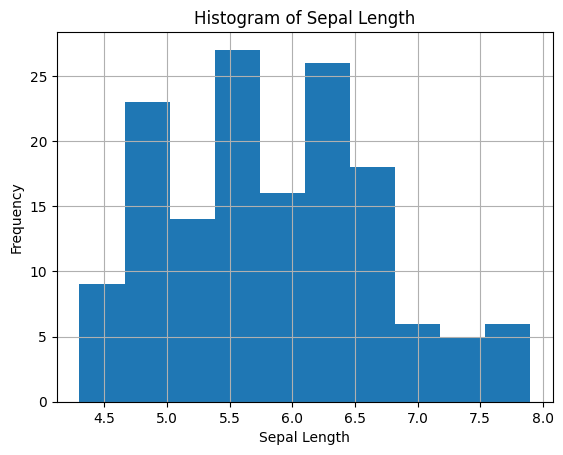

In [411]:

iris_data['sepal_length'].hist()

plt.xlabel('Sepal Length')
plt.ylabel('Frequency')
plt.title('Histogram of Sepal Length')
plt.show()


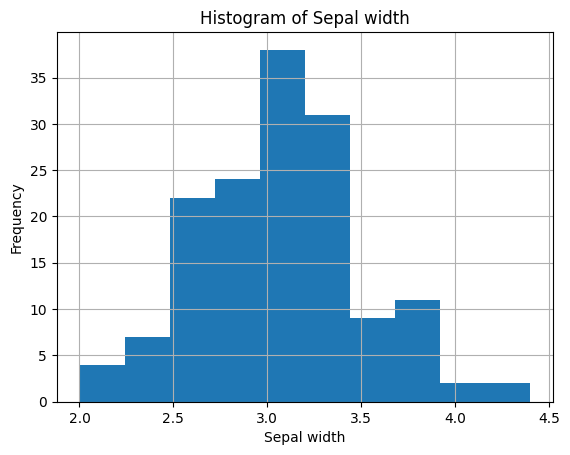

In [412]:
iris_data['sepal_width'].hist()

plt.xlabel('Sepal width')
plt.ylabel('Frequency')
plt.title('Histogram of Sepal width')
plt.show()

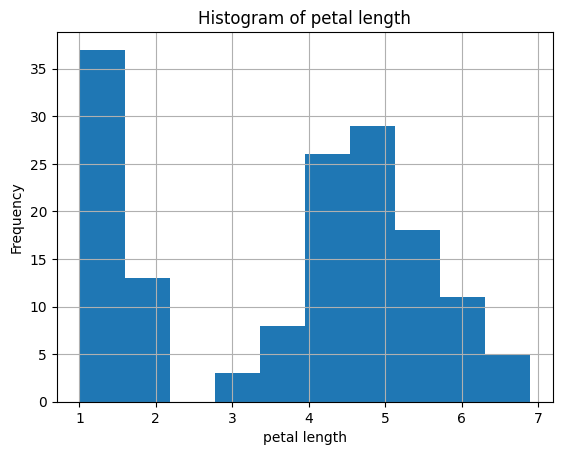

In [413]:
iris_data['petal_length'].hist()

plt.xlabel('petal length')
plt.ylabel('Frequency')
plt.title('Histogram of petal length')
plt.show()

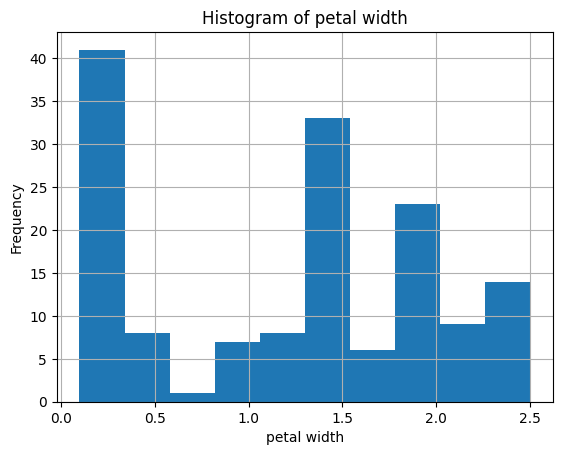

In [414]:
iris_data['petal_width'].hist()

plt.xlabel('petal width')
plt.ylabel('Frequency')
plt.title('Histogram of petal width')
plt.show()

*****SCATTERPLOT*****

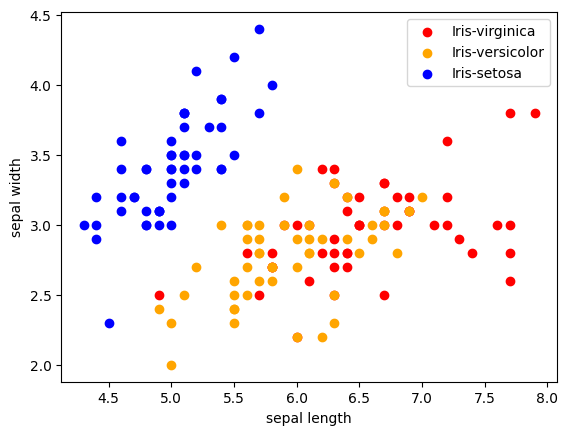

In [415]:

colors = ['red', 'orange', 'blue']
species = ['Iris-virginica', 'Iris-versicolor', 'Iris-setosa']


for i in range(3):
    x = iris_data[iris_data['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['sepal_width'], c=colors[i], label=species[i])

plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.legend()
plt.show()


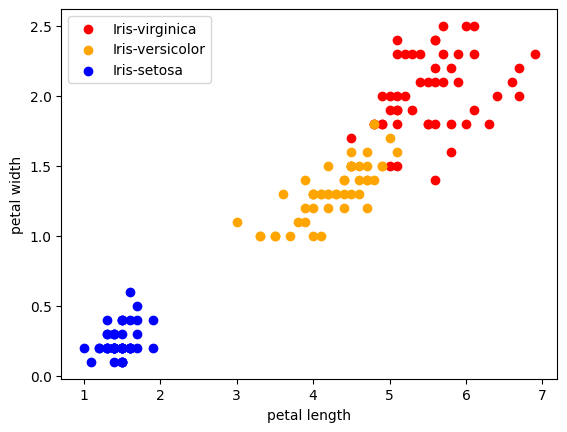

In [416]:
for i in range(3):
    x = iris_data[iris_data['species'] == species[i]]
    plt.scatter(x['petal_length'], x['petal_width'], c=colors[i], label=species[i])

plt.xlabel("petal length")
plt.ylabel("petal width")
plt.legend()
plt.show()


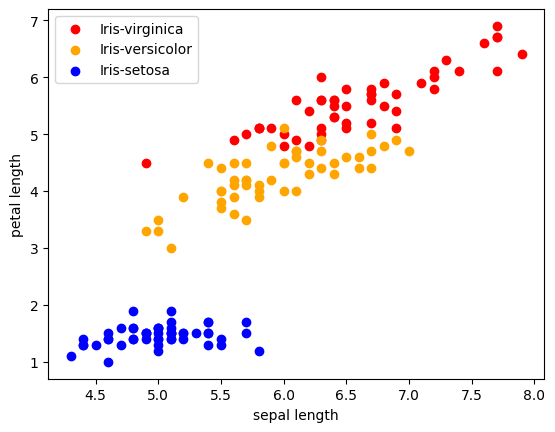

In [417]:
for i in range(3):
    x = iris_data[iris_data['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['petal_length'], c=colors[i], label=species[i])

plt.xlabel("sepal length")
plt.ylabel("petal length")
plt.legend()
plt.show()


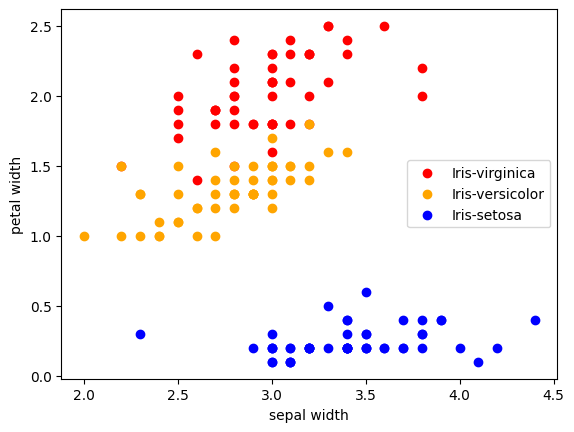

In [418]:
for i in range(3):
    x = iris_data[iris_data['species'] == species[i]]
    plt.scatter(x['sepal_width'], x['petal_width'], c=colors[i], label=species[i])

plt.xlabel("sepal width")
plt.ylabel("petal width")
plt.legend()
plt.show()

******COORELATION MATRIX******

In [436]:
numeric_columns = iris_data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()
print(correlation_matrix)




              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000


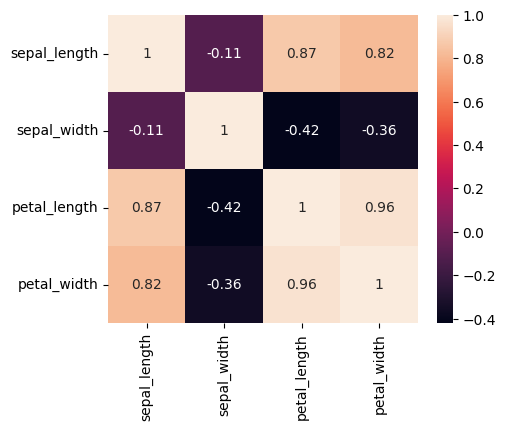

In [420]:

numeric_columns = iris_data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(5,4))
sns.heatmap(correlation_matrix, annot=True)
plt.show()



******LABEL ENCODER******

In [421]:
iris_data['species'] = le.fit_transform(iris_data['species'])
iris_data.head()                                  

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [422]:
x=iris_data.drop(columns=['species'])
y=iris_data['species']
print(x)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


In [423]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32


******TRAINING AND TESTING******

******SPLITING THE DATA INTO TRAINING AND TESTING DATA******

In [424]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30)

In [425]:
print(x.shape ,x_train.shape,x_test.shape)


(150, 4) (105, 4) (45, 4)


******MODEL TRAINING******

******LOGISTIC REGRESSION******

In [426]:
model=LogisticRegression(max_iter=1000)

****TRAINING THE LOGISTIC REGRESSSION MODEL WITH TRAINING DATA****

In [427]:
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

****MODEL EVALUATION****

****ACCURACY SCORE****

In [428]:
print('Accuracy:', model.score(x_test, y_test) * 100)

Accuracy: 100.0


******IMPORTING KNN******

In [429]:
model=KNeighborsClassifier()

In [430]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [431]:
print('Accuracy:', model.score(x_test, y_test) * 100)

Accuracy: 97.77777777777777


******DECISION TREE CLASSIFIER******

In [432]:

model = DecisionTreeClassifier()


In [433]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [434]:
print('Accuracy:', model.score(x_test, y_test) * 100)

Accuracy: 93.33333333333333
